## Time Series Analysis and Forecasting
### Assignment 03

Consider the Copper datasets in StatsModels.<br>
Train an appropriate model to forecast the consumption based on price, income index and aluminium price(alternative to copper)

In [22]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [20]:
copper_df = sm.datasets.copper.load_pandas()
copper_df.data.head()

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0


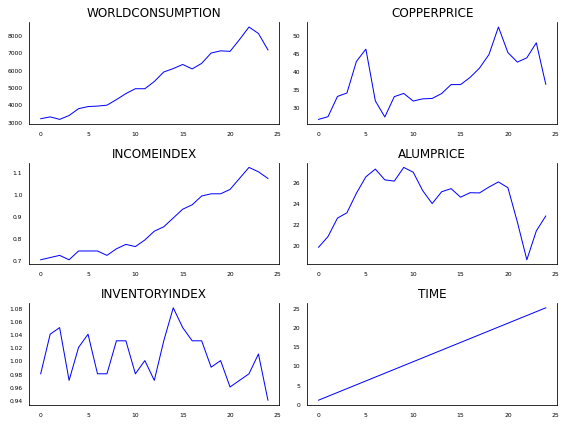

In [35]:
# Check the data trend
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
    data = copper_df.data[copper_df.data.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(copper_df.data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [55]:
#Stationarity Check
from statsmodels.tsa.stattools import adfuller
ad_fuller_result_1 = adfuller(copper_df.data['WORLDCONSUMPTION'].diff()[1:])

print('Stationarity check: realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

Stationarity check: realgdp
ADF Statistic: -5.997780446646075
p-value: 1.6854276351572132e-07


#### The first difference is stationary

#### Granger Causality Check 

In [70]:
from statsmodels.tsa.stattools import grangercausalitytests

y = copper_df.data.WORLDCONSUMPTION

for i in range(0,4):
    print(f'{copper_df.data.columns[i+1]} Granger cause CONS:')
    granger = grangercausalitytests(copper_df.data[['WORLDCONSUMPTION', 
                                                    copper_df.data.columns[i+1]]], 
                                    maxlag=2)
    print('------------------')

COPPERPRICE Granger cause CONS:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2942  , p=0.5932  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=0.3362  , p=0.5620  , df=1
likelihood ratio test: chi2=0.3339  , p=0.5634  , df=1
parameter F test:         F=0.2942  , p=0.5932  , df_denom=21, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5357  , p=0.5943  , df_denom=18, df_num=2
ssr based chi2 test:   chi2=1.3689  , p=0.5044  , df=2
likelihood ratio test: chi2=1.3297  , p=0.5143  , df=2
parameter F test:         F=0.5357  , p=0.5943  , df_denom=18, df_num=2
------------------
INCOMEINDEX Granger cause CONS:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0021  , p=0.9643  , df_denom=21, df_num=1
ssr based chi2 test:   chi2=0.0023  , p=0.9614  , df=1
likelihood ratio test: chi2=0.0023  , p=0.9614  , df=1
parameter F test:         F=0.0021  , p=0.9643  , df_denom=21, df_num=1

Granger Causalit

From the above we observe that only Aluminium price granger causes copper consumption.

In [87]:
from sktime.forecasting.sarimax import SARIMAX

y = copper_df.data.WORLDCONSUMPTION
X = copper_df.data.ALUMPRICE 

forecaster = SARIMAX(order=(2, 1, 0), trend="t", seasonal_order=(0, 0, 0, 0))
model = forecaster.fit(y, X)

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -169.685
Date:                Wed, 30 Nov 2022   AIC                            349.369
Time:                        20:12:34   BIC                            355.259
Sample:                             0   HQIC                           350.932
                                 - 25                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         13.1218      7.538      1.741      0.082      -1.653      27.897
ALUMPRICE    -36.8093     65.038     -0.566      0.571    -164.282      90.663
ar.L1          0.4340      0.353      1.228      0.219      -0.259       1.127
ar.L2         -0.6483      0.303     -2.143      0.032      -1.241      -0.055
sigma2      7.562e+04   3.04e+04      2.484      0.013     1.6e+04    1.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 7.29
Prob(Q):                              0.52   Prob(JB):                         0.03
Heteroskedasticity (H):               3.51   Skew:                            -1.22
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""